# Index
<ul>
<li>1. Data Preprocessing without One Hot Encoding</li>
    <ul>
    <li>1.1 Trying one hot encoding for fuel column</li>
    <li>1.2 Not trying one hot encoding</li>
    <li>1.3 Trying Regression Algorithms</li>
    </ul>
<li>2. Doing one hot encoding for categorical columns</li>
<li>3. Applying Deep Neural Networks and again regression algorithms.</li>
</ul>

In [595]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [596]:
data = pd.read_csv("Nigerian_Car_Prices.csv")

# Data Preprocessing 

In [597]:
data

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN
...,...,...,...,...,...,...,...,...,...,...
4090,4090,Honda,2004.0,Nigerian Used,207446.0,3500.0,Petrol,Automatic,"1,125,000",NaN
4091,4091,Toyota,2005.0,Nigerian Used,106914.0,1800.0,Petrol,Automatic,"2,643,750",NaN
4092,4092,Honda,2006.0,Nigerian Used,247149.0,1800.0,Petrol,Automatic,"1,462,500",NaN
4093,4093,Toyota,2007.0,Nigerian Used,249325.0,2500.0,Petrol,Automatic,"2,475,000",NaN


## Droping Null Values

In [598]:
data.dropna(inplace=True)

In [599]:
data.columns

Index(['Unnamed: 0', 'Make', 'Year of manufacture', 'Condition', 'Mileage',
       'Engine Size', 'Fuel', 'Transmission', 'Price', 'Build'],
      dtype='object')

In [600]:
data

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
32,32,Lexus,2011.0,Nigerian Used,105546.0,4600.0,Petrol,Automatic,"14,040,000",SUV
44,44,Toyota,2014.0,Nigerian Used,216924.0,2500.0,Petrol,Automatic,"9,360,000",SUV
50,50,Toyota,2014.0,Nigerian Used,216924.0,2500.0,Petrol,Automatic,"9,360,000",SUV
54,54,Lexus,2016.0,Nigerian Used,107355.0,5700.0,Petrol,Automatic,"42,000,000",SUV
57,57,Mercedes-Benz,2007.0,Foreign Used,209466.0,4700.0,Petrol,Automatic,"4,515,000",SUV
...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,Nigerian Used,151916.0,3000.0,Petrol,Automatic,"1,575,000",SUV
4075,4075,Toyota,2007.0,Nigerian Used,126793.0,3300.0,Hybrid,Automatic,"2,981,250",SUV
4076,4076,Mercedes-Benz,2007.0,Nigerian Used,201183.0,4700.0,Petrol,Automatic,"5,625,000",SUV
4084,4084,Lexus,2006.0,Nigerian Used,183979.0,4700.0,Petrol,Automatic,"5,720,000",SUV


In [601]:
data["Condition"].value_counts()

Nigerian Used    765
Foreign Used     334
Brand New          2
Name: Condition, dtype: int64

In [602]:
def condition(s):
    if s[0]=='N':
        return 1
    elif s[0]=='F':
        return 2
    else:
        return 0

In [603]:
data["Condition"]= data["Condition"].apply(condition)

In [604]:
data

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
32,32,Lexus,2011.0,1,105546.0,4600.0,Petrol,Automatic,"14,040,000",SUV
44,44,Toyota,2014.0,1,216924.0,2500.0,Petrol,Automatic,"9,360,000",SUV
50,50,Toyota,2014.0,1,216924.0,2500.0,Petrol,Automatic,"9,360,000",SUV
54,54,Lexus,2016.0,1,107355.0,5700.0,Petrol,Automatic,"42,000,000",SUV
57,57,Mercedes-Benz,2007.0,2,209466.0,4700.0,Petrol,Automatic,"4,515,000",SUV
...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,1,151916.0,3000.0,Petrol,Automatic,"1,575,000",SUV
4075,4075,Toyota,2007.0,1,126793.0,3300.0,Hybrid,Automatic,"2,981,250",SUV
4076,4076,Mercedes-Benz,2007.0,1,201183.0,4700.0,Petrol,Automatic,"5,625,000",SUV
4084,4084,Lexus,2006.0,1,183979.0,4700.0,Petrol,Automatic,"5,720,000",SUV


In [605]:
data["Fuel"].value_counts()

Petrol    1084
Hybrid      12
Diesel       5
Name: Fuel, dtype: int64

In [606]:
data['Build'].value_counts()

SUV    1101
Name: Build, dtype: int64

In [607]:
data['Transmission'].value_counts()

Automatic    1078
CVT            10
Manual          7
AMT             6
Name: Transmission, dtype: int64

In [608]:
def transmission(s):
    if s=="Automatic":
        return 1
    elif s=="CVT":
        return 2
    elif s=='Manual':
        return 3
    else:
        return 0

In [609]:
data["Transmission"]  = data["Transmission"].apply(transmission)

In [610]:
data

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
32,32,Lexus,2011.0,1,105546.0,4600.0,Petrol,1,"14,040,000",SUV
44,44,Toyota,2014.0,1,216924.0,2500.0,Petrol,1,"9,360,000",SUV
50,50,Toyota,2014.0,1,216924.0,2500.0,Petrol,1,"9,360,000",SUV
54,54,Lexus,2016.0,1,107355.0,5700.0,Petrol,1,"42,000,000",SUV
57,57,Mercedes-Benz,2007.0,2,209466.0,4700.0,Petrol,1,"4,515,000",SUV
...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,1,151916.0,3000.0,Petrol,1,"1,575,000",SUV
4075,4075,Toyota,2007.0,1,126793.0,3300.0,Hybrid,1,"2,981,250",SUV
4076,4076,Mercedes-Benz,2007.0,1,201183.0,4700.0,Petrol,1,"5,625,000",SUV
4084,4084,Lexus,2006.0,1,183979.0,4700.0,Petrol,1,"5,720,000",SUV


In [611]:
def price(s):
    s = s.split(",")
    return int(''.join(s))

In [612]:
price("14,040,000")

14040000

In [613]:
data["Price"]=data["Price"].apply(price)

In [614]:
data

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
32,32,Lexus,2011.0,1,105546.0,4600.0,Petrol,1,14040000,SUV
44,44,Toyota,2014.0,1,216924.0,2500.0,Petrol,1,9360000,SUV
50,50,Toyota,2014.0,1,216924.0,2500.0,Petrol,1,9360000,SUV
54,54,Lexus,2016.0,1,107355.0,5700.0,Petrol,1,42000000,SUV
57,57,Mercedes-Benz,2007.0,2,209466.0,4700.0,Petrol,1,4515000,SUV
...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,1,151916.0,3000.0,Petrol,1,1575000,SUV
4075,4075,Toyota,2007.0,1,126793.0,3300.0,Hybrid,1,2981250,SUV
4076,4076,Mercedes-Benz,2007.0,1,201183.0,4700.0,Petrol,1,5625000,SUV
4084,4084,Lexus,2006.0,1,183979.0,4700.0,Petrol,1,5720000,SUV


<AxesSubplot:>

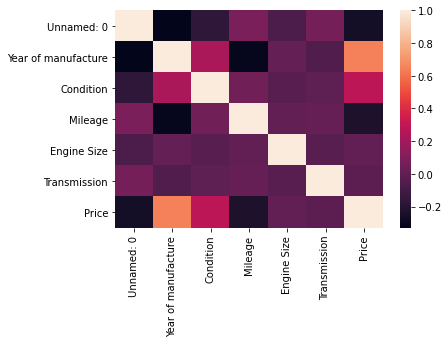

In [615]:
sns.heatmap(data.corr())

## First Trying One Hot Encoding

In [616]:
from sklearn.preprocessing import OneHotEncoder
one = pd.get_dummies(data, columns = ['Fuel'])

In [617]:
one

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Transmission,Price,Build,Fuel_Diesel,Fuel_Hybrid,Fuel_Petrol
32,32,Lexus,2011.0,1,105546.0,4600.0,1,14040000,SUV,0,0,1
44,44,Toyota,2014.0,1,216924.0,2500.0,1,9360000,SUV,0,0,1
50,50,Toyota,2014.0,1,216924.0,2500.0,1,9360000,SUV,0,0,1
54,54,Lexus,2016.0,1,107355.0,5700.0,1,42000000,SUV,0,0,1
57,57,Mercedes-Benz,2007.0,2,209466.0,4700.0,1,4515000,SUV,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,1,151916.0,3000.0,1,1575000,SUV,0,0,1
4075,4075,Toyota,2007.0,1,126793.0,3300.0,1,2981250,SUV,0,1,0
4076,4076,Mercedes-Benz,2007.0,1,201183.0,4700.0,1,5625000,SUV,0,0,1
4084,4084,Lexus,2006.0,1,183979.0,4700.0,1,5720000,SUV,0,0,1


In [618]:
X = one[["Year of manufacture","Condition","Mileage","Engine Size","Transmission","Fuel_Diesel","Fuel_Hybrid","Fuel_Petrol"]]

In [619]:
X['Mileage'] = X['Mileage'].astype('int')
X["Engine Size"] = X["Engine Size"].astype('int')
X["Year of manufacture"] = X["Year of manufacture"].astype('int')

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [620]:
X

,Year of manufacture,Condition,Mileage,Engine Size,Transmission,Fuel_Diesel,Fuel_Hybrid,Fuel_Petrol
32,2011,1,105546,4600,1,0,0,1
44,2014,1,216924,2500,1,0,0,1
50,2014,1,216924,2500,1,0,0,1
54,2016,1,107355,5700,1,0,0,1
57,2007,2,209466,4700,1,0,0,1
...,...,...,...,...,...,...,...,...
4067,2001,1,151916,3000,1,0,0,1
4075,2007,1,126793,3300,1,0,1,0
4076,2007,1,201183,4700,1,0,0,1
4084,2006,1,183979,4700,1,0,0,1


In [621]:
y = data["Price"]

In [622]:
y

32      14040000
44       9360000
50       9360000
54      42000000
57       4515000
          ...   
4067     1575000
4075     2981250
4076     5625000
4084     5720000
4085     5625000
Name: Price, Length: 1101, dtype: int64

In [623]:
from sklearn.model_selection import train_test_split

In [624]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [625]:
from sklearn.linear_model import LinearRegression

In [626]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [627]:
model.score(X_train,y_train)

0.45634613187090534

In [628]:
model.score(X_test,y_test)

0.4519246714879128

## Trying to imporve by Normalizing Data

In [629]:
from sklearn.preprocessing import MinMaxScaler

In [630]:
scale = MinMaxScaler()

In [631]:
X_scaled = scale.fit_transform(X.to_numpy())

In [632]:
X.columns

Index(['Year of manufacture', 'Condition', 'Mileage', 'Engine Size',
       'Transmission', 'Fuel_Diesel', 'Fuel_Hybrid', 'Fuel_Petrol'],
      dtype='object')

In [633]:
X_scaled

array([[0.58333333, 0.5       , 0.03947589, ..., 0.        , 0.        ,
        1.        ],
       [0.70833333, 0.5       , 0.08116464, ..., 0.        , 0.        ,
        1.        ],
       [0.70833333, 0.5       , 0.08116464, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.41666667, 0.5       , 0.07527279, ..., 0.        , 0.        ,
        1.        ],
       [0.375     , 0.5       , 0.06883334, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.5       , 0.03878643, ..., 0.        , 0.        ,
        1.        ]])

In [634]:
X_scaled = pd.DataFrame(X_scaled, columns=['Year of manufacture', 'Condition', 'Mileage', 'Engine Size','Transmission', 'Fuel_Diesel', 'Fuel_Hybrid', 'Fuel_Petrol'])

In [635]:
X_scaled

,Year of manufacture,Condition,Mileage,Engine Size,Transmission,Fuel_Diesel,Fuel_Hybrid,Fuel_Petrol
0,0.583333,0.5,0.039476,0.091946,0.333333,0.0,0.0,1.0
1,0.708333,0.5,0.081165,0.049943,0.333333,0.0,0.0,1.0
2,0.708333,0.5,0.081165,0.049943,0.333333,0.0,0.0,1.0
3,0.791667,0.5,0.040153,0.113947,0.333333,0.0,0.0,1.0
4,0.416667,1.0,0.078373,0.093946,0.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1096,0.166667,0.5,0.056832,0.059944,0.333333,0.0,0.0,1.0
1097,0.416667,0.5,0.047429,0.065944,0.333333,0.0,1.0,0.0
1098,0.416667,0.5,0.075273,0.093946,0.333333,0.0,0.0,1.0
1099,0.375000,0.5,0.068833,0.093946,0.333333,0.0,0.0,1.0


In [636]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=2)

In [637]:
model2 = LinearRegression()

In [638]:
model2.fit(X_train,y_train)

LinearRegression()

In [639]:
model2.score(X_train,y_train)

0.456346131870904

In [640]:
model2.score(X_test,y_test)

0.4519246714874685

In [641]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [642]:
model_pipeline = [('sgd',SGDRegressor()),('svm',SVR()),('forest',RandomForestRegressor()),
         ('ada', AdaBoostRegressor()),('bag',BaggingRegressor()),('extree',ExtraTreesRegressor()),
          ('grad',GradientBoostingRegressor()),('xgb',XGBRegressor())]

In [643]:
for i,j in model_pipeline:
    model = j 
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print(i,score)

sgd 0.45675070197682
svm -0.07803617301956578
forest 0.7375386271069233
ada 0.512018489081768
bag 0.6750235509231055
extree 0.6454120669847258
grad 0.7015482305565377
xgb 0.7467971506991804


In [644]:
final_model = GradientBoostingRegressor()

In [645]:
final_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [646]:
final_model.score(X_test,y_test)

0.6938549562143309

In [647]:
preds = final_model.predict(X_test)

In [648]:
mean_squared_error(y_test,preds)

7028273140919.673

In [649]:
r2_score(y_test,preds)

0.6938549562143309

# GradientBoostingRegressor() has the best performance so far

# Not trying one hot encoding

In [650]:
def fuel(s):
    if s=="Petrol":
        return 0
    elif s=="Diesel":
        return 1
    else:
        return 2

In [651]:
data.Fuel.value_counts()

Petrol    1084
Hybrid      12
Diesel       5
Name: Fuel, dtype: int64

In [652]:
data["Fuel"] = data["Fuel"].apply(fuel)

In [653]:
data

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
32,32,Lexus,2011.0,1,105546.0,4600.0,0,1,14040000,SUV
44,44,Toyota,2014.0,1,216924.0,2500.0,0,1,9360000,SUV
50,50,Toyota,2014.0,1,216924.0,2500.0,0,1,9360000,SUV
54,54,Lexus,2016.0,1,107355.0,5700.0,0,1,42000000,SUV
57,57,Mercedes-Benz,2007.0,2,209466.0,4700.0,0,1,4515000,SUV
...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,1,151916.0,3000.0,0,1,1575000,SUV
4075,4075,Toyota,2007.0,1,126793.0,3300.0,2,1,2981250,SUV
4076,4076,Mercedes-Benz,2007.0,1,201183.0,4700.0,0,1,5625000,SUV
4084,4084,Lexus,2006.0,1,183979.0,4700.0,0,1,5720000,SUV


In [654]:
X = data[["Year of manufacture","Condition","Mileage","Engine Size","Transmission","Fuel"]]

In [655]:
y = data["Price"]

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [657]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.38993394750464216

In [658]:
model_pipeline2 = [('sgd',SGDRegressor()),('svm',SVR()),('forest',RandomForestRegressor()),
         ('ada', AdaBoostRegressor()),('bag',BaggingRegressor()),('extree',ExtraTreesRegressor()),
          ('grad',GradientBoostingRegressor()),('xgb',XGBRegressor())]

In [659]:
for i,j in model_pipeline2:
    model = j 
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print(i,score)

sgd -4.976890464175202e+25
svm -0.07803324705611647
forest 0.7330473135589596
ada 0.5876047779146816
bag 0.7329467640030258
extree 0.6328525427226189
grad 0.6986005522320681
xgb 0.7439649283060723


In [660]:
grad = GradientBoostingRegressor()
grad.fit(X_train,y_train)
preds = grad.predict(X_test)
print("MSE:",mean_squared_error(y_test,preds))
print("r2:",r2_score(y_test,preds))

MSE: 6842540396334.687
r2: 0.7019453018914715


In [661]:
X

,Year of manufacture,Condition,Mileage,Engine Size,Transmission,Fuel
32,2011.0,1,105546.0,4600.0,1,0
44,2014.0,1,216924.0,2500.0,1,0
50,2014.0,1,216924.0,2500.0,1,0
54,2016.0,1,107355.0,5700.0,1,0
57,2007.0,2,209466.0,4700.0,1,0
...,...,...,...,...,...,...
4067,2001.0,1,151916.0,3000.0,1,0
4075,2007.0,1,126793.0,3300.0,1,2
4076,2007.0,1,201183.0,4700.0,1,0
4084,2006.0,1,183979.0,4700.0,1,0


In [662]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X["Mileage"] = MinMaxScaler().fit_transform(np.array(X["Mileage"]).reshape(-1,1))
X["Engine Size"] = MinMaxScaler().fit_transform(np.array(X["Engine Size"]).reshape(-1,1))

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Preparaing data for Neural Network

In [663]:
def year(s):
    if s<=2008:
        return 1
    else:
        return 2

In [664]:
X["Year of manufacture"]=X["Year of manufacture"].apply(year)

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [665]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [666]:
X_train

,Year of manufacture,Condition,Mileage,Engine Size,Transmission,Fuel
1543,1,1,0.086922,0.087945,1,0
3815,1,1,0.035173,0.069944,1,0
3715,2,1,0.068046,0.069944,1,0
3444,2,2,0.067020,0.000640,1,0
661,1,1,0.025327,0.093946,1,0
...,...,...,...,...,...,...
841,2,1,0.068532,0.000540,1,0
1189,2,1,0.032519,0.065944,1,0
690,2,1,0.033657,0.069944,1,0
1290,2,1,0.041899,0.073944,1,0


# Trying Neural Network

In [709]:
data2 = pd.read_csv("Nigerian_Car_Prices.csv")

In [710]:
data2.dropna(inplace=True)

In [711]:
data2

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
32,32,Lexus,2011.0,Nigerian Used,105546.0,4600.0,Petrol,Automatic,"14,040,000",SUV
44,44,Toyota,2014.0,Nigerian Used,216924.0,2500.0,Petrol,Automatic,"9,360,000",SUV
50,50,Toyota,2014.0,Nigerian Used,216924.0,2500.0,Petrol,Automatic,"9,360,000",SUV
54,54,Lexus,2016.0,Nigerian Used,107355.0,5700.0,Petrol,Automatic,"42,000,000",SUV
57,57,Mercedes-Benz,2007.0,Foreign Used,209466.0,4700.0,Petrol,Automatic,"4,515,000",SUV
...,...,...,...,...,...,...,...,...,...,...
4067,4067,Toyota,2001.0,Nigerian Used,151916.0,3000.0,Petrol,Automatic,"1,575,000",SUV
4075,4075,Toyota,2007.0,Nigerian Used,126793.0,3300.0,Hybrid,Automatic,"2,981,250",SUV
4076,4076,Mercedes-Benz,2007.0,Nigerian Used,201183.0,4700.0,Petrol,Automatic,"5,625,000",SUV
4084,4084,Lexus,2006.0,Nigerian Used,183979.0,4700.0,Petrol,Automatic,"5,720,000",SUV


In [712]:
from sklearn.preprocessing import OneHotEncoder
data2 = pd.get_dummies(data2, columns = ['Fuel'])

In [713]:
data2 = pd.get_dummies(data2, columns = ['Condition'])

In [714]:
data2 = pd.get_dummies(data2, columns = ['Transmission'])

In [715]:
def price(s):
    s = s.split(",")
    return int(''.join(s))

In [716]:
data2["Price"]=data2["Price"].apply(price)

In [717]:
data2["Mileage"] = MinMaxScaler().fit_transform(np.array(data2["Mileage"]).reshape(-1,1))
data2["Engine Size"] = MinMaxScaler().fit_transform(np.array(data2["Engine Size"]).reshape(-1,1))

In [719]:
data2=data2.drop(['Unnamed: 0',"Make",'Build'],axis=1)

In [720]:
data2

,Year of manufacture,Mileage,Engine Size,Price,Fuel_Diesel,Fuel_Hybrid,Fuel_Petrol,Condition_Brand New,Condition_Foreign Used,Condition_Nigerian Used,Transmission_AMT,Transmission_Automatic,Transmission_CVT,Transmission_Manual
32,2011.0,0.039476,0.091946,14040000,0,0,1,0,0,1,0,1,0,0
44,2014.0,0.081165,0.049943,9360000,0,0,1,0,0,1,0,1,0,0
50,2014.0,0.081165,0.049943,9360000,0,0,1,0,0,1,0,1,0,0
54,2016.0,0.040153,0.113947,42000000,0,0,1,0,0,1,0,1,0,0
57,2007.0,0.078373,0.093946,4515000,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,2001.0,0.056832,0.059944,1575000,0,0,1,0,0,1,0,1,0,0
4075,2007.0,0.047429,0.065944,2981250,0,1,0,0,0,1,0,1,0,0
4076,2007.0,0.075273,0.093946,5625000,0,0,1,0,0,1,0,1,0,0
4084,2006.0,0.068833,0.093946,5720000,0,0,1,0,0,1,0,1,0,0


In [721]:
X = data2.copy()

In [722]:
X.drop(['Price'],axis=1)

,Year of manufacture,Mileage,Engine Size,Fuel_Diesel,Fuel_Hybrid,Fuel_Petrol,Condition_Brand New,Condition_Foreign Used,Condition_Nigerian Used,Transmission_AMT,Transmission_Automatic,Transmission_CVT,Transmission_Manual
32,2011.0,0.039476,0.091946,0,0,1,0,0,1,0,1,0,0
44,2014.0,0.081165,0.049943,0,0,1,0,0,1,0,1,0,0
50,2014.0,0.081165,0.049943,0,0,1,0,0,1,0,1,0,0
54,2016.0,0.040153,0.113947,0,0,1,0,0,1,0,1,0,0
57,2007.0,0.078373,0.093946,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,2001.0,0.056832,0.059944,0,0,1,0,0,1,0,1,0,0
4075,2007.0,0.047429,0.065944,0,1,0,0,0,1,0,1,0,0
4076,2007.0,0.075273,0.093946,0,0,1,0,0,1,0,1,0,0
4084,2006.0,0.068833,0.093946,0,0,1,0,0,1,0,1,0,0


In [723]:
y = data2["Price"]

In [724]:
y

32      14040000
44       9360000
50       9360000
54      42000000
57       4515000
          ...   
4067     1575000
4075     2981250
4076     5625000
4084     5720000
4085     5625000
Name: Price, Length: 1101, dtype: int64

In [725]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=20)

In [726]:
X_train

,Year of manufacture,Mileage,Engine Size,Price,Fuel_Diesel,Fuel_Hybrid,Fuel_Petrol,Condition_Brand New,Condition_Foreign Used,Condition_Nigerian Used,Transmission_AMT,Transmission_Automatic,Transmission_CVT,Transmission_Manual
1982,2014.0,0.044888,0.065944,9880000,0,0,1,0,1,0,0,1,0,0
774,2006.0,0.032910,0.065944,3150000,0,1,0,0,0,1,0,1,0,0
2694,2005.0,0.062383,0.039942,1250000,0,0,1,0,0,1,0,1,0,0
1361,2006.0,0.036031,0.069944,1995000,0,0,1,0,0,1,0,1,0,0
2351,2009.0,0.067087,0.069944,2625000,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,2006.0,0.091505,0.079945,3150000,0,0,1,0,0,1,0,1,0,0
939,2011.0,0.022966,0.039942,5625000,0,0,1,0,0,1,0,1,0,0
3126,2005.0,0.049923,0.111947,3150000,0,0,1,0,0,1,0,1,0,0
631,2018.0,0.005362,0.069944,18375000,0,0,1,0,1,0,0,1,0,0


In [727]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [728]:
X_train.shape

(990, 14)

In [747]:
model =Sequential()
model.add(Dense(250,input_dim=14,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.01),loss="mse")

In [748]:
model.fit(X_train.values, y_train.values,epochs=300,validation_split=0.2)

Epoch 1/300
25/25 [==============================] - 1s 9ms/step - loss: 8711827357696.0000 - val_loss: 188871819264.0000
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 1474558951424.0000 - val_loss: 4380916187136.0000
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 1541752881152.0000 - val_loss: 10865554432.0000
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 16417778688.0000 - val_loss: 267316032.0000
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 105143744.0000 - val_loss: 113276248.0000
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 105575464.0000 - val_loss: 16698480.0000
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 746233536.0000 - val_loss: 8358829056.0000
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 15989388288.0000 - val_loss: 23901937664.0000
Epoch 9/300
25/25 [==============================] - 

In [749]:
prediction = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,prediction)))
print("R2 Score:",r2_score(y_test,prediction))

RMSE: 52.447839811577566
R2 Score: 0.999999999942055


In [750]:
np.sqrt(mean_squared_error(y_test,prediction))

52.447839811577566

# Results of NN

# again checking the regression algorithms

In [742]:
model_pipeline3 = [('sgd',SGDRegressor()),('svm',SVR()),('forest',RandomForestRegressor()),
         ('ada', AdaBoostRegressor()),('bag',BaggingRegressor()),('extree',ExtraTreesRegressor()),
          ('grad',GradientBoostingRegressor()),('xgb',XGBRegressor())]


In [745]:
for i,j in model_pipeline3:
    model = j 
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    prediction = model.predict(X_test)
    print(i,score,np.sqrt(mean_squared_error(y_test,prediction)))

sgd -2.0270635827198633e+30 9.809647991267126e+21
svm -0.09275597005096459 7202467.905116671
forest 0.9969456632408199 380783.56651278905
ada 0.9838616427700524 875284.8269567731
bag 0.9979492294877619 312017.00933597184
extree 0.9997071042596352 117916.95767890527
grad 0.9980303461565359 305783.9537240621
xgb 0.99720609769188 364187.7604352763


# Performamce is improved but not close as Neural Network

# Conclusions
1. Data Preprocessing plays the major role in performance.
2. Neural Networks are good :)